In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [4]:
from datetime import date
from datetime import datetime

days_in_year = 365.2425 
date_now = datetime.strptime('Jan 1 2021', '%b %d %Y')   

In [5]:
data['Age'] = (2021 - data['Year_Birth'])

In [6]:
data['Years_customer'] = (pd.Timestamp('now').year) - (pd.to_datetime(data['Dt_Customer']).dt.year)

In [7]:
data['Total_Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [8]:
data['Total_Acc_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

#EDA

In [9]:
data.shape

(2240, 33)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [11]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Years_customer          0
Total_Expenses          0
Total_Acc_Cmp           0
dtype: int64

In [12]:
data['Income'].sort_values(ascending=True)

1245    1730.0
21      2447.0
1524    3502.0
1846    4023.0
1975    4428.0
         ...  
2078       NaN
2079       NaN
2081       NaN
2084       NaN
2228       NaN
Name: Income, Length: 2240, dtype: float64

In [13]:
data['ID'].nunique()

2240

In [14]:
data[data['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_customer,Total_Expenses,Total_Acc_Cmp
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,38,8,19,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,35,8,637,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,62,8,186,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,70,7,124,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,39,8,46,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,48,9,109,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0,64,9,603,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,64,7,18,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0,48,8,985,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0,60,8,404,0


##Visualisation numeric data

###Year Birth

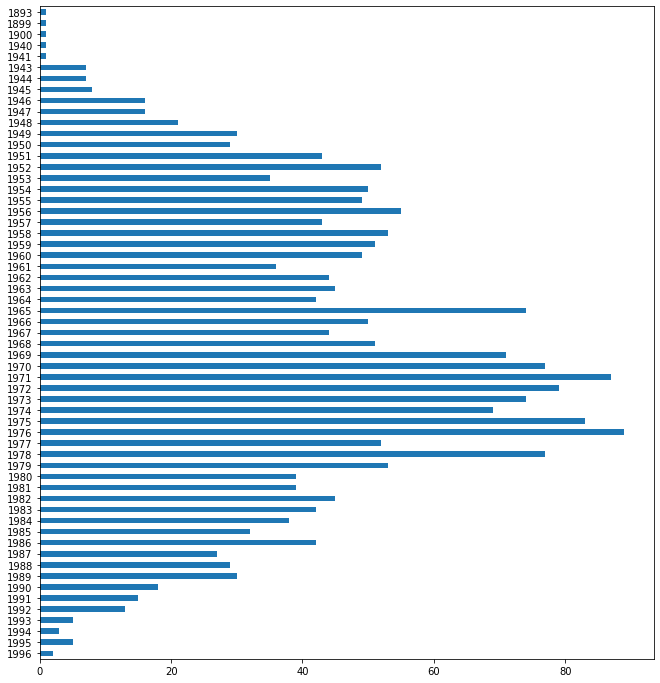

In [15]:
plt.figure(figsize=(11,12))
data['Year_Birth'].value_counts().sort_index(ascending=False).plot(kind='barh')

Most customers are people that was born in 1965 - 1978

###Recency

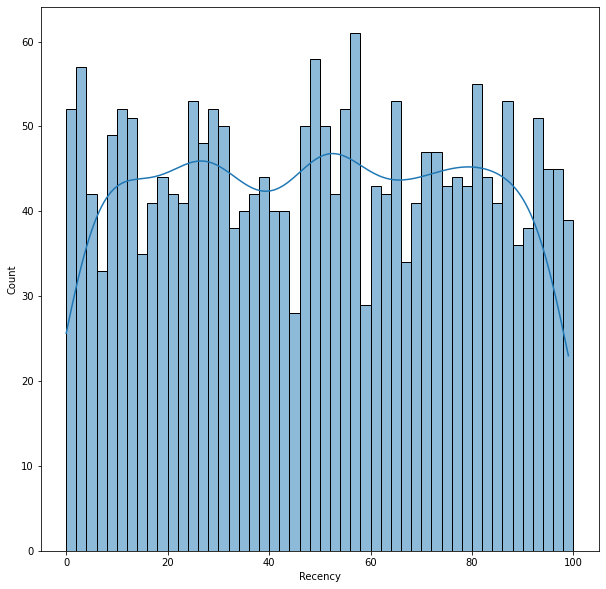

In [16]:
plt.figure(figsize=(10,10))
sns.histplot(data=data, x='Recency', binwidth=2, kde=True)

###Income

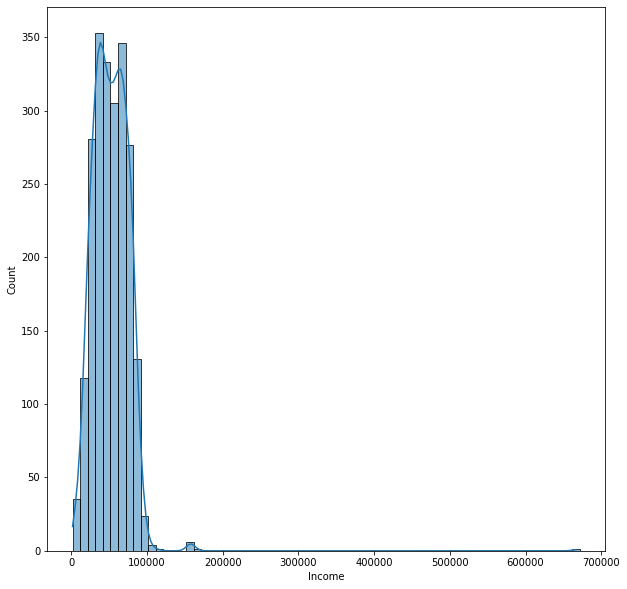

In [17]:
plt.figure(figsize=(10,10))
sns.histplot(data=data, x='Income', binwidth=10000, kde=True)

###Mount Wines

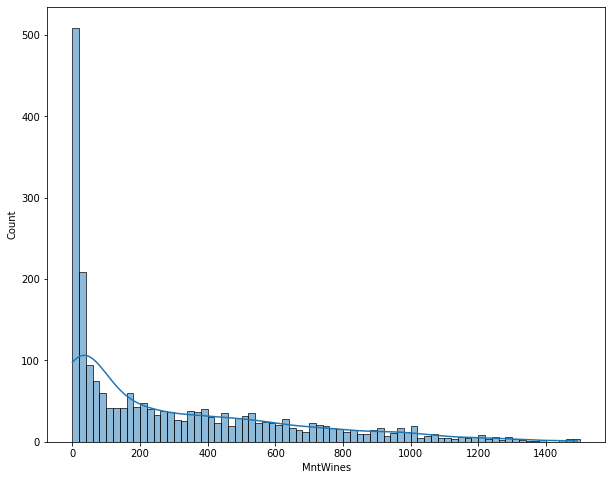

In [18]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='MntWines', binwidth=20, kde=True)

###Mount Fruits

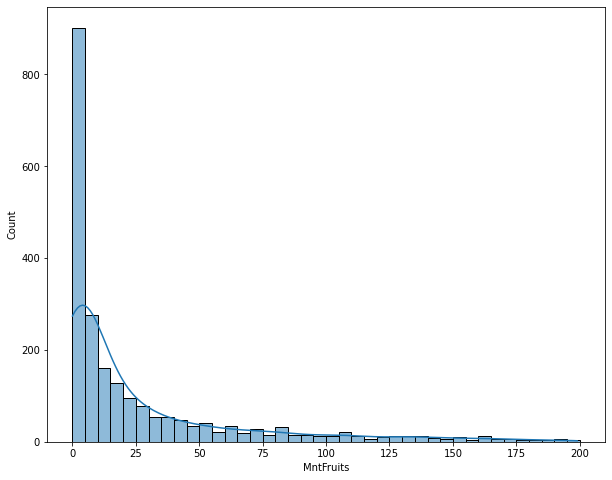

In [19]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='MntFruits', binwidth=5, kde=True)

###Mount Meat Products

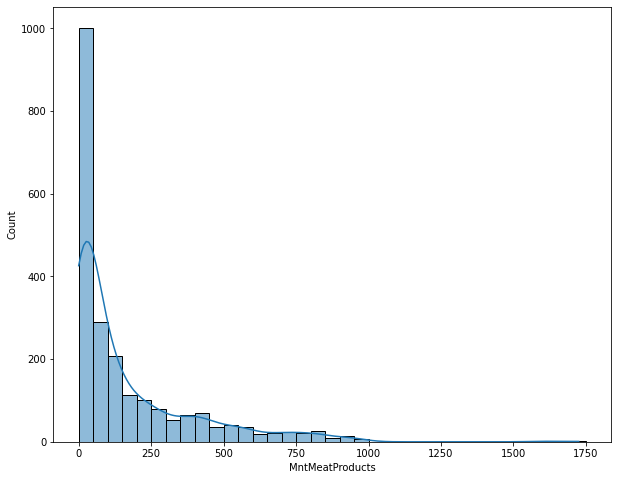

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='MntMeatProducts', binwidth=50, kde=True)

###Mount Fish Products

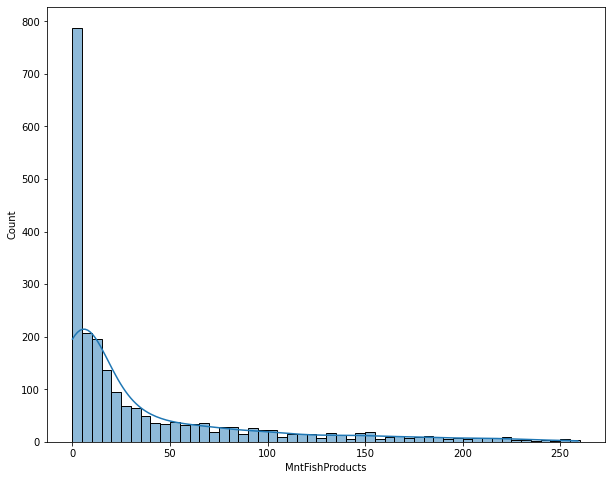

In [21]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='MntFishProducts', binwidth=5, kde=True)

###Mount Sweet

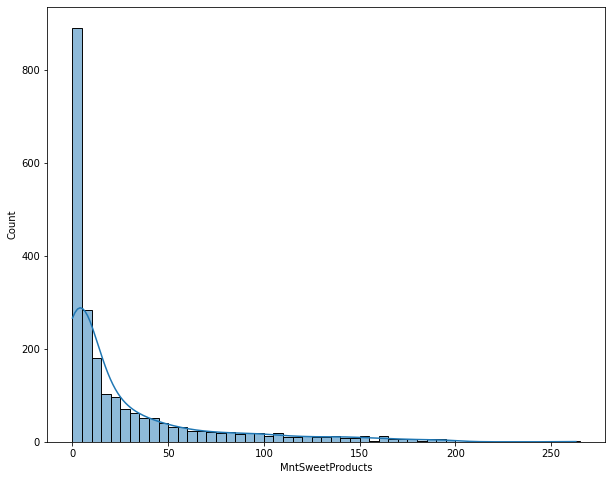

In [22]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='MntSweetProducts', binwidth=5, kde=True)

###Mount Gold

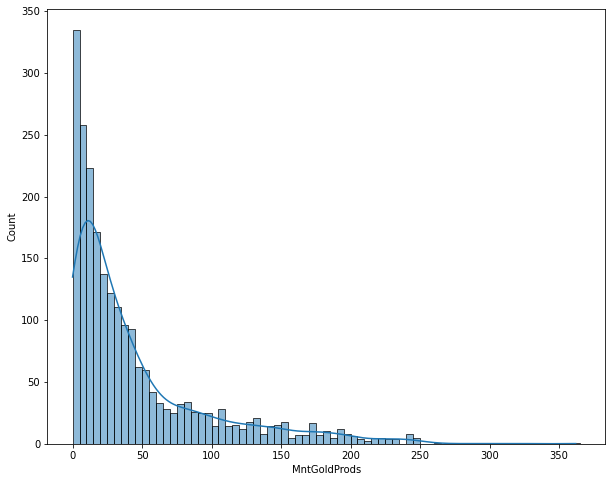

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='MntGoldProds', binwidth=5, kde=True)

###Num Deals Purchase

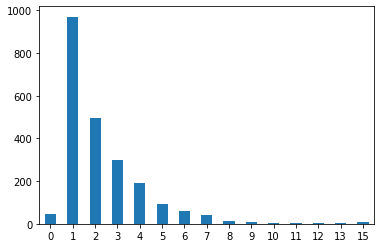

In [24]:
data['NumDealsPurchases'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.show()

###Num Web Purchase

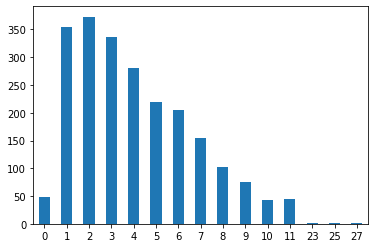

In [25]:
data['NumWebPurchases'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.show()

###Num Catalog Purchase

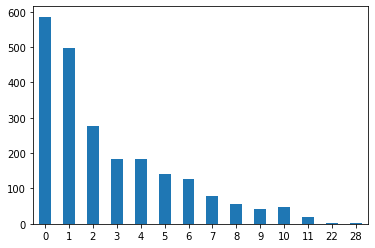

In [26]:
data['NumCatalogPurchases'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.show()

###Num Store Purchase

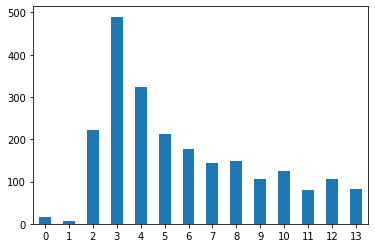

In [27]:
data['NumStorePurchases'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.show()

###Num Web Visits 1 Month

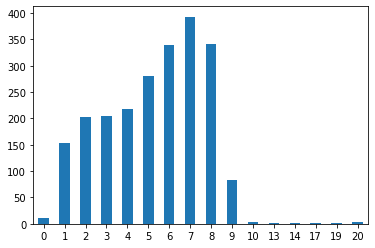

In [28]:
data['NumWebVisitsMonth'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.show()

###Heatmap

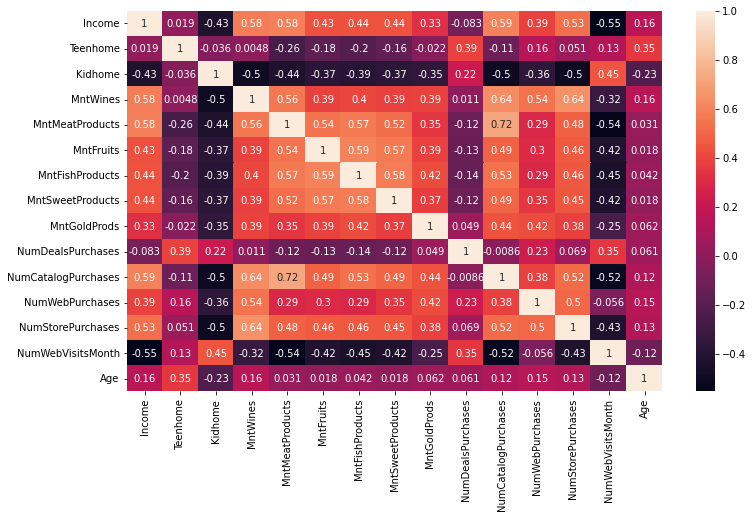

In [29]:
plt.figure(figsize=(12,7))
sns.heatmap(data[['Income', 'Teenhome','Kidhome','MntWines','MntMeatProducts',
                  'MntFruits', 'MntFishProducts','MntSweetProducts','MntGoldProds',
                  'NumDealsPurchases','NumCatalogPurchases','NumWebPurchases',
                  'NumStorePurchases','NumWebVisitsMonth','Age']].corr(), annot=True)

Those containing strong correlation:
- Income:
 - Negative correlation: kidhome, web visits
 - Positive correlation: total expenses, catalog purchase, store purchase 
- Kidhome:
 - Negative correlation: Wine products, meat products, catalog purchase, store purchase
 - Positive correlation: web visits
- Those who bought high amount of a product, have higher probability to also buy a high amount of other products

##Visualisation categorical data

###Education

Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: Education, dtype: float64


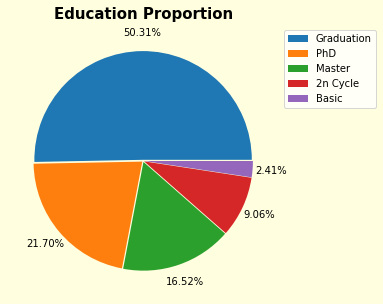

In [30]:
data_education = data['Education'].value_counts(normalize=True)*100
print(data_education)
plt.figure(figsize=(6,5), facecolor='lightyellow')
plt.pie(data_education, autopct='%.2f%%', pctdistance = 1.17, explode=(0.01,0.01, 0.01,0.01,0.01))
plt.title('Education Proportion', fontsize=15, fontweight='bold')
plt.legend(['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic'], bbox_to_anchor=(1, 1), fontsize=10)
plt.show()

Graduation has the highest value, and the lowest is basic

###Marital Status

Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: Marital_Status, dtype: float64


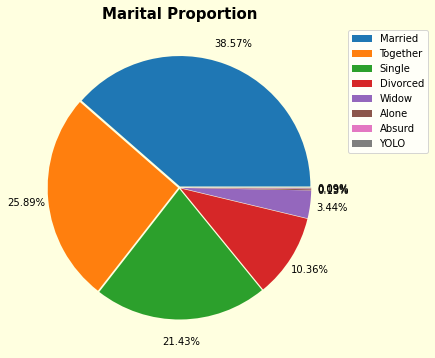

In [31]:
data_marital = data['Marital_Status'].value_counts(normalize=True)*100
print(data_marital)
plt.figure(figsize=(7,6), facecolor='lightyellow')
plt.pie(data_marital, autopct='%.2f%%', pctdistance = 1.17, explode=(0.01,0.01, 0.01,0.01,0.01,0.01,0.01,0.01))
plt.legend(['Married', 'Together', 'Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Marital Proportion', fontsize=15, fontweight='bold')
plt.show()

Most custommers are married, followed by together, then single. The lowest is yolo

###Kid Home

0    57.723214
1    40.133929
2     2.142857
Name: Kidhome, dtype: float64


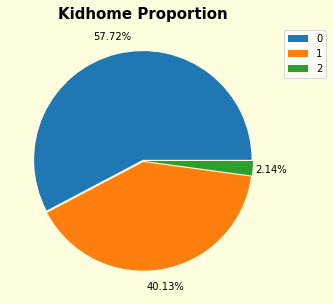

In [32]:
data_kidhome = data['Kidhome'].value_counts(normalize=True)*100
print(data_kidhome)
plt.figure(figsize=(6,5), facecolor='lightyellow')
plt.pie(data_kidhome, autopct='%.2f%%', pctdistance = 1.17, explode=(0.01,0.01, 0.01))
plt.title('Kidhome Proportion', fontsize=15, fontweight='bold')
plt.legend(['0', '1', '2'], bbox_to_anchor=(1, 1), fontsize=10)
plt.show()

Most customers don't have kids

###Teen Home

0    51.696429
1    45.982143
2     2.321429
Name: Teenhome, dtype: float64


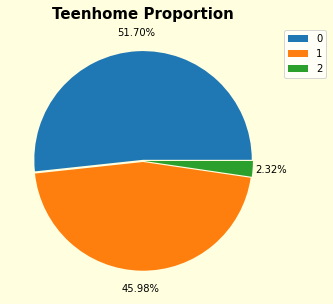

In [33]:
data_Teenhome = data['Teenhome'].value_counts(normalize=True)*100
print(data_Teenhome)
plt.figure(figsize=(6,5), facecolor='lightyellow')
plt.pie(data_Teenhome, autopct='%.2f%%', pctdistance = 1.17, explode=(0.01,0.01, 0.01))
plt.title('Teenhome Proportion', fontsize=15, fontweight='bold')
plt.legend(['0', '1', '2'], bbox_to_anchor=(1, 1), fontsize=10)
plt.show()

Most customers don't have teen child

###Accepted Camp 1

0    93.571429
1     6.428571
Name: AcceptedCmp1, dtype: float64


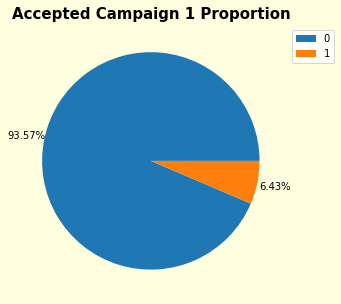

In [34]:
data_cmp1 = data['AcceptedCmp1'].value_counts(normalize=True)*100
print(data_cmp1)
plt.figure(figsize=(6,5), facecolor='lightyellow')
plt.pie(data_cmp1, autopct='%.2f%%', pctdistance = 1.17)
plt.legend(['0', '1'], bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Accepted Campaign 1 Proportion', fontsize=15, fontweight='bold')
plt.show()

The percentage of those who accepted the first campaign is 6.43%

###Accepted Camp 2

0    98.660714
1     1.339286
Name: AcceptedCmp2, dtype: float64


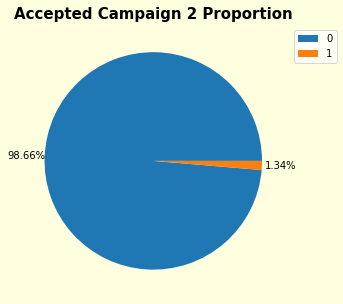

In [35]:
data_cmp2 = data['AcceptedCmp2'].value_counts(normalize=True)*100
print(data_cmp2)
plt.figure(figsize=(6,5), facecolor='lightyellow')
plt.pie(data_cmp2, autopct='%.2f%%', pctdistance = 1.17)
plt.legend(['0', '1'], bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Accepted Campaign 2 Proportion', fontsize=15, fontweight='bold')
plt.show()

The percentage of those who accepted the second campaign is 1.34%

###Accepted Camp 3

0    92.723214
1     7.276786
Name: AcceptedCmp3, dtype: float64


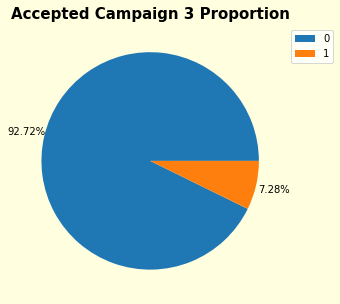

In [36]:
data_cmp3 = data['AcceptedCmp3'].value_counts(normalize=True)*100
print(data_cmp3)
plt.figure(figsize=(6,5), facecolor='lightyellow')
plt.pie(data_cmp3, autopct='%.2f%%', pctdistance = 1.17)
plt.legend(['0', '1'], bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Accepted Campaign 3 Proportion', fontsize=15, fontweight='bold')
plt.show()

The percentage of those who accepted the third campaign is 7.28%

###Accepted Camp 4

0    92.544643
1     7.455357
Name: AcceptedCmp4, dtype: float64


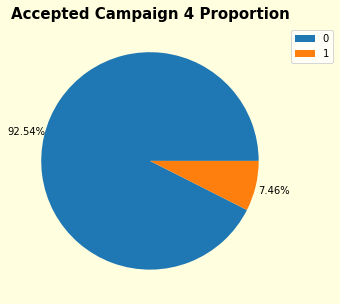

In [37]:
data_cmp4 = data['AcceptedCmp4'].value_counts(normalize=True)*100
print(data_cmp4)
plt.figure(figsize=(6,5), facecolor='lightyellow')
plt.pie(data_cmp4, autopct='%.2f%%', pctdistance = 1.17)
plt.legend(['0', '1'], bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Accepted Campaign 4 Proportion', fontsize=15, fontweight='bold')
plt.show()

The percentage of those who accepted the fourth campaign is 7.46%

###Accepted Camp 5

0    92.723214
1     7.276786
Name: AcceptedCmp5, dtype: float64


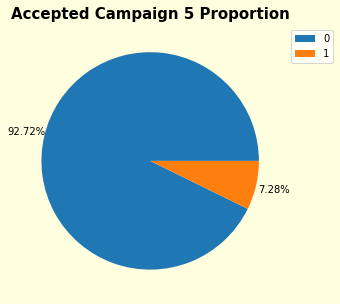

In [38]:
data_cmp5 = data['AcceptedCmp5'].value_counts(normalize=True)*100
print(data_cmp5)
plt.figure(figsize=(6,5), facecolor='lightyellow')
plt.pie(data_cmp5, autopct='%.2f%%', pctdistance = 1.17)
plt.legend(['0', '1'], bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Accepted Campaign 5 Proportion', fontsize=15, fontweight='bold')
plt.show()

The percentage of those who accepted the fifth campaign is 7.28%

###Complain

0    99.0625
1     0.9375
Name: Complain, dtype: float64


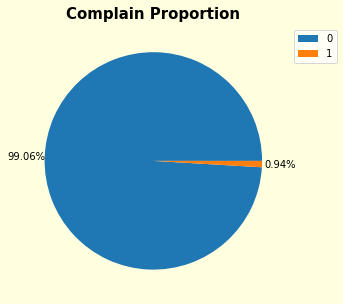

In [39]:
data_complain = data['Complain'].value_counts(normalize=True)*100
print(data_complain)
plt.figure(figsize=(6,5), facecolor='lightyellow')
plt.pie(data_complain, autopct='%.2f%%', pctdistance = 1.17)
plt.legend(['0', '1'], bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Complain Proportion', fontsize=15, fontweight='bold')
plt.show()

###Response

0    85.089286
1    14.910714
Name: Response, dtype: float64


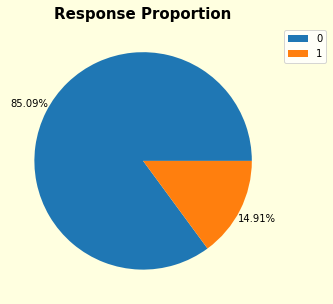

In [40]:
data_response = data['Response'].value_counts(normalize=True)*100
print(data_response)
plt.figure(figsize=(6,5), facecolor='lightyellow')
plt.pie(data_response, autopct='%.2f%%', pctdistance = 1.17)
plt.legend(['0', '1'], bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Response Proportion', fontsize=15, fontweight='bold')
plt.show()

##Visualisation Detailed Exploration

###Accepted Camp

####Education

Graduation    82
PhD           30
Master        18
2n Cycle      14
Name: Education, dtype: int64


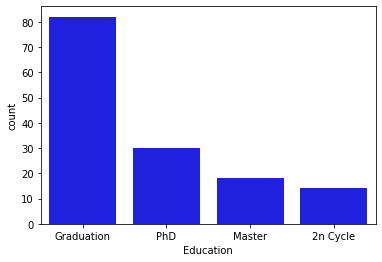

In [41]:
print(data[data['AcceptedCmp1']==1]['Education'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp1']==1], x='Education', color='blue', order=data[data['AcceptedCmp1']==1]['Education'].value_counts().index)

Graduation    16
PhD           10
2n Cycle       2
Master         2
Name: Education, dtype: int64


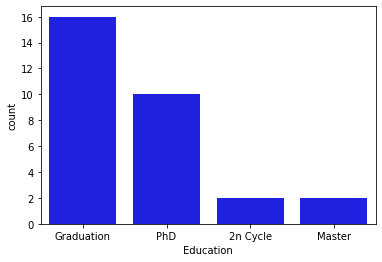

In [42]:
print(data[data['AcceptedCmp2']==1]['Education'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp2']==1], x='Education', color='blue', order=data[data['AcceptedCmp2']==1]['Education'].value_counts().index)

Graduation    78
PhD           40
Master        24
2n Cycle      15
Basic          6
Name: Education, dtype: int64


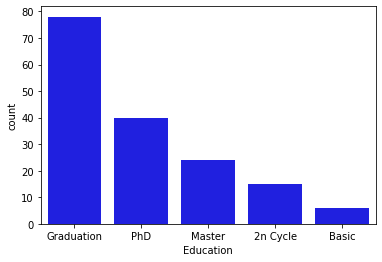

In [43]:
print(data[data['AcceptedCmp3']==1]['Education'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp3']==1], x='Education', color='blue', order=data[data['AcceptedCmp3']==1]['Education'].value_counts().index)

Graduation    81
PhD           45
Master        31
2n Cycle      10
Name: Education, dtype: int64


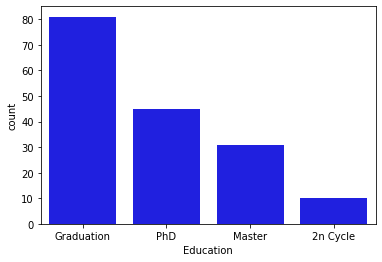

In [44]:
print(data[data['AcceptedCmp4']==1]['Education'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp4']==1], x='Education', color='blue', order=data[data['AcceptedCmp4']==1]['Education'].value_counts().index)

Graduation    86
PhD           39
Master        28
2n Cycle      10
Name: Education, dtype: int64


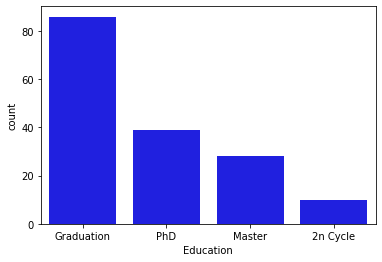

In [45]:
print(data[data['AcceptedCmp5']==1]['Education'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp5']==1], x='Education', color='blue', order=data[data['AcceptedCmp5']==1]['Education'].value_counts().index)

In [46]:
data[['Education', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].groupby('Education').sum()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Education,,,,,
2n Cycle,14,2,15,10,10
Basic,0,0,6,0,0
Graduation,82,16,78,81,86
Master,18,2,24,31,28
PhD,30,10,40,45,39


Those who accepted the campaigns are mostly from the graduated educational background

####Marital status

Married     63
Together    32
Single      31
Divorced    12
Widow        5
Absurd       1
Name: Marital_Status, dtype: int64


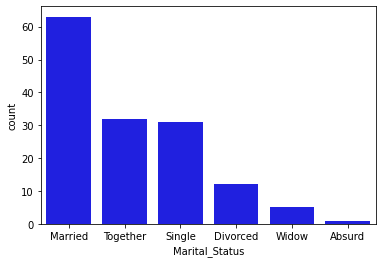

In [47]:
print(data[data['AcceptedCmp1']==1]['Marital_Status'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp1']==1], x='Marital_Status', color='blue', order=data[data['AcceptedCmp1']==1]['Marital_Status'].value_counts().index)

Together    12
Married      7
Divorced     5
Single       5
Widow        1
Name: Marital_Status, dtype: int64


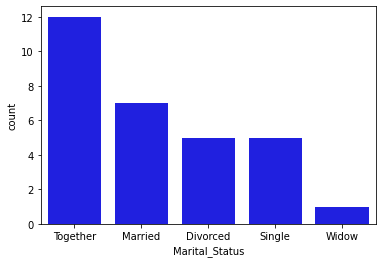

In [48]:
print(data[data['AcceptedCmp2']==1]['Marital_Status'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp2']==1], x='Marital_Status', color='blue', order=data[data['AcceptedCmp2']==1]['Marital_Status'].value_counts().index)

Married     63
Single      38
Together    37
Divorced    20
Widow        4
Alone        1
Name: Marital_Status, dtype: int64


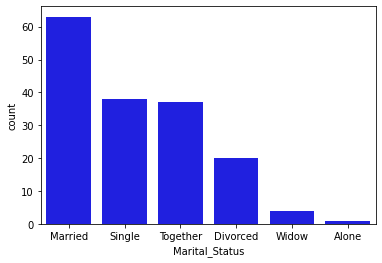

In [49]:
print(data[data['AcceptedCmp3']==1]['Marital_Status'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp3']==1], x='Marital_Status', color='blue', order=data[data['AcceptedCmp3']==1]['Marital_Status'].value_counts().index)

Married     63
Together    43
Single      33
Divorced    18
Widow       10
Name: Marital_Status, dtype: int64


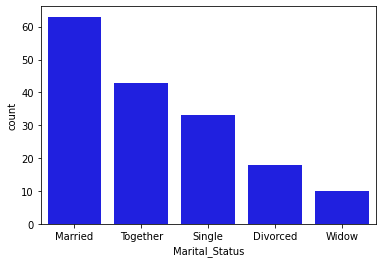

In [50]:
print(data[data['AcceptedCmp4']==1]['Marital_Status'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp4']==1], x='Marital_Status', color='blue', order=data[data['AcceptedCmp4']==1]['Marital_Status'].value_counts().index)

Married     66
Together    44
Single      31
Divorced    13
Widow        8
Absurd       1
Name: Marital_Status, dtype: int64


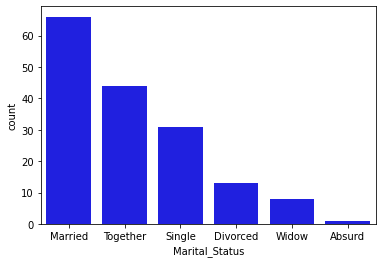

In [51]:
print(data[data['AcceptedCmp5']==1]['Marital_Status'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp5']==1], x='Marital_Status', color='blue', order=data[data['AcceptedCmp5']==1]['Marital_Status'].value_counts().index)

In [52]:
data[['Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].groupby('Marital_Status').sum()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Marital_Status,,,,,
Absurd,1,0,0,0,1
Alone,0,0,1,0,0
Divorced,12,5,20,18,13
Married,63,7,63,63,66
Single,31,5,38,33,31
Together,32,12,37,43,44
Widow,5,1,4,10,8
YOLO,0,0,0,0,0


Those who accepted the campaigns are mostly married

####Kid home

0    133
1      9
2      2
Name: Kidhome, dtype: int64


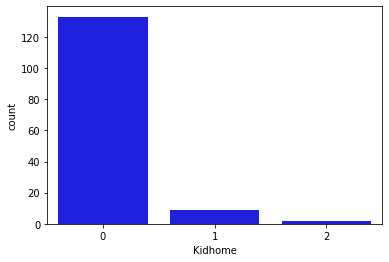

In [53]:
print(data[data['AcceptedCmp1']==1]['Kidhome'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp1']==1], x='Kidhome', color='blue', order=data[data['AcceptedCmp1']==1]['Kidhome'].value_counts().index)

0    28
1     2
Name: Kidhome, dtype: int64


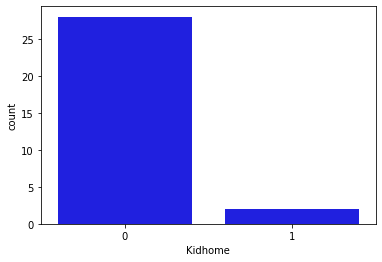

In [54]:
print(data[data['AcceptedCmp2']==1]['Kidhome'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp2']==1], x='Kidhome', color='blue', order=data[data['AcceptedCmp2']==1]['Kidhome'].value_counts().index)

0    87
1    75
2     1
Name: Kidhome, dtype: int64


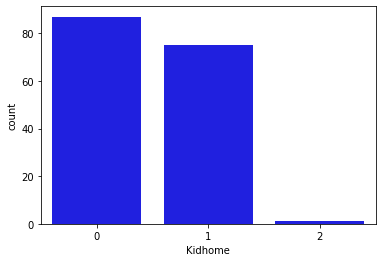

In [55]:
print(data[data['AcceptedCmp3']==1]['Kidhome'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp3']==1], x='Kidhome', color='blue', order=data[data['AcceptedCmp3']==1]['Kidhome'].value_counts().index)

0    144
1     23
Name: Kidhome, dtype: int64


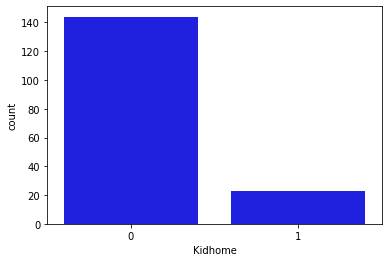

In [56]:
print(data[data['AcceptedCmp4']==1]['Kidhome'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp4']==1], x='Kidhome', color='blue', order=data[data['AcceptedCmp4']==1]['Kidhome'].value_counts().index)

0    155
1      8
Name: Kidhome, dtype: int64


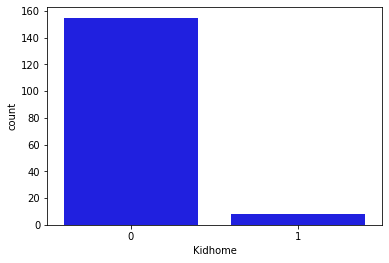

In [57]:
print(data[data['AcceptedCmp5']==1]['Kidhome'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp5']==1], x='Kidhome', color='blue', order=data[data['AcceptedCmp5']==1]['Kidhome'].value_counts().index)

In [58]:
data[['Kidhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].groupby('Kidhome').sum()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Kidhome,,,,,
0,133,28,87,144,155
1,9,2,75,23,8
2,2,0,1,0,0


Those who accepted the campaigns are mostly that doesn't have any kids

####Teen home

0    115
1     27
2      2
Name: Teenhome, dtype: int64


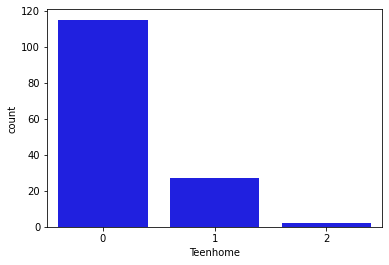

In [59]:
print(data[data['AcceptedCmp1']==1]['Teenhome'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp1']==1], x='Teenhome', color='blue', order=data[data['AcceptedCmp1']==1]['Teenhome'].value_counts().index)

0    18
1    11
2     1
Name: Teenhome, dtype: int64


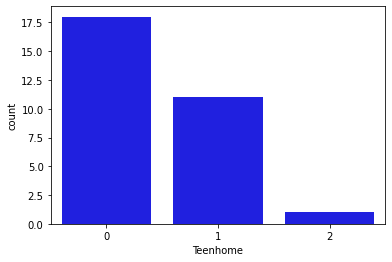

In [60]:
print(data[data['AcceptedCmp2']==1]['Teenhome'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp2']==1], x='Teenhome', color='blue', order=data[data['AcceptedCmp2']==1]['Teenhome'].value_counts().index)

0    98
1    61
2     4
Name: Teenhome, dtype: int64


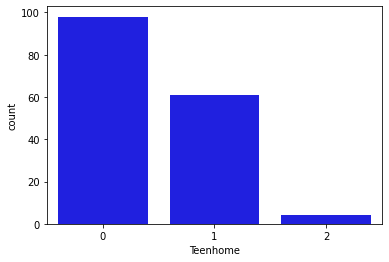

In [61]:
print(data[data['AcceptedCmp3']==1]['Teenhome'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp3']==1], x='Teenhome', color='blue', order=data[data['AcceptedCmp3']==1]['Teenhome'].value_counts().index)

1    85
0    76
2     6
Name: Teenhome, dtype: int64


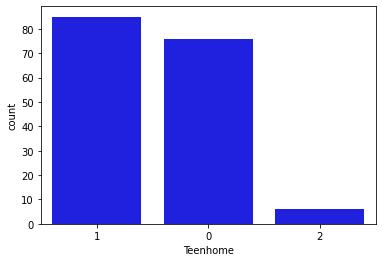

In [62]:
print(data[data['AcceptedCmp4']==1]['Teenhome'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp4']==1], x='Teenhome', color='blue', order=data[data['AcceptedCmp4']==1]['Teenhome'].value_counts().index)

0    144
1     16
2      3
Name: Teenhome, dtype: int64


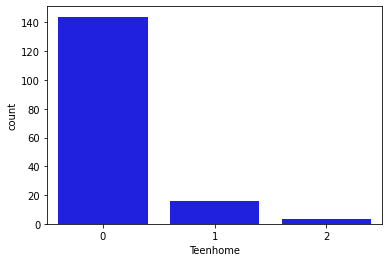

In [63]:
print(data[data['AcceptedCmp5']==1]['Teenhome'].value_counts())
sns.countplot(data=data.loc[data['AcceptedCmp5']==1], x='Teenhome', color='blue', order=data[data['AcceptedCmp5']==1]['Teenhome'].value_counts().index)

In [64]:
data[['Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].groupby('Teenhome').sum()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Teenhome,,,,,
0,115,18,98,76,144
1,27,11,61,85,16
2,2,1,4,6,3


Those who accpeted the campaigns mostly don't have teens at home

####Age

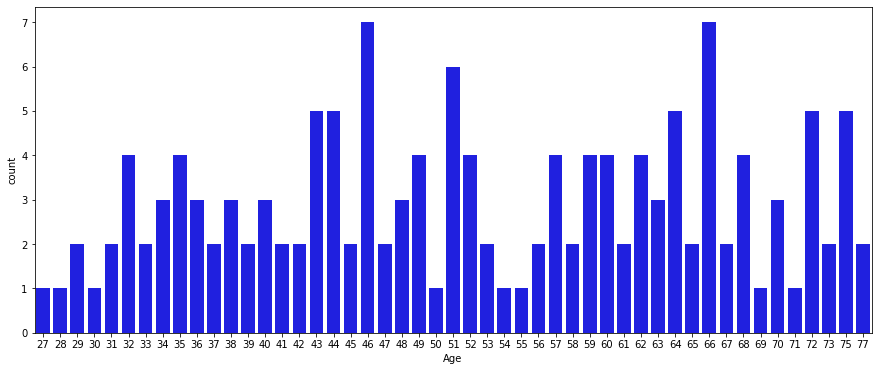

In [65]:
plt.figure(figsize=(15,6))
sns.countplot(data=data.loc[data['AcceptedCmp1']==1], x='Age', color='blue')

####Total

0    1777
1     325
2      83
3      44
4      11
Name: Total_Acc_Cmp, dtype: int64


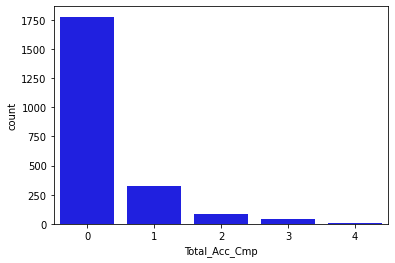

In [66]:
print(data['Total_Acc_Cmp'].value_counts())
sns.countplot(data=data, x='Total_Acc_Cmp', color='blue')

###Recency

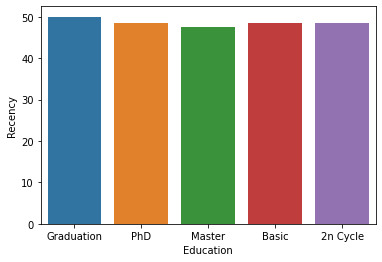

In [67]:
sns.barplot(x=data['Education'], y=data['Recency'], ci=None)

<BarContainer object of 2240 artists>

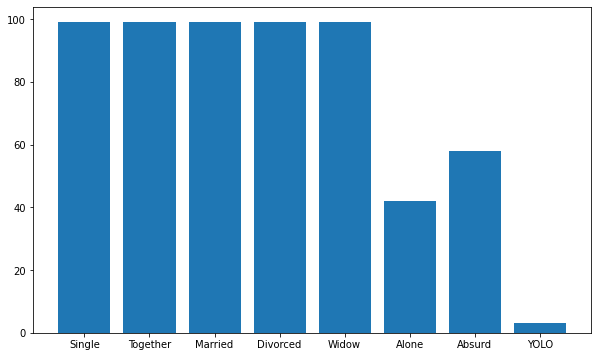

In [68]:
plt.figure(figsize=(10,6))
plt.bar(data['Marital_Status'], data['Recency'])

###Buying Products

####Wines

<BarContainer object of 2240 artists>

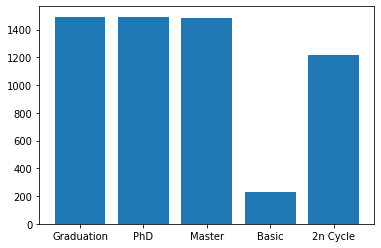

In [69]:
plt.bar(data['Education'], data['MntWines'])

<BarContainer object of 2240 artists>

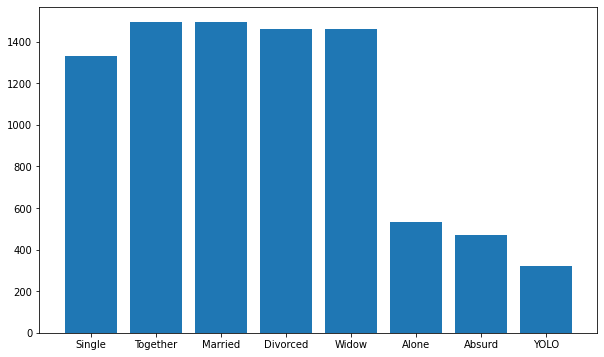

In [70]:
plt.figure(figsize=(10,6))
plt.bar(data['Marital_Status'], data['MntWines'])

<BarContainer object of 2240 artists>

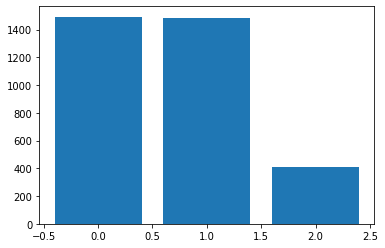

In [71]:
plt.bar(data['Kidhome'], data['MntWines'])

<BarContainer object of 2240 artists>

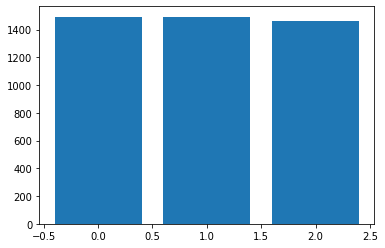

In [72]:
plt.bar(data['Teenhome'], data['MntWines'])

####Fruits

<BarContainer object of 2240 artists>

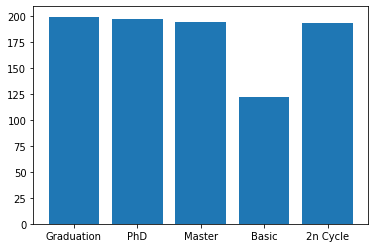

In [73]:
plt.bar(data['Education'], data['MntFruits'])

<BarContainer object of 2240 artists>

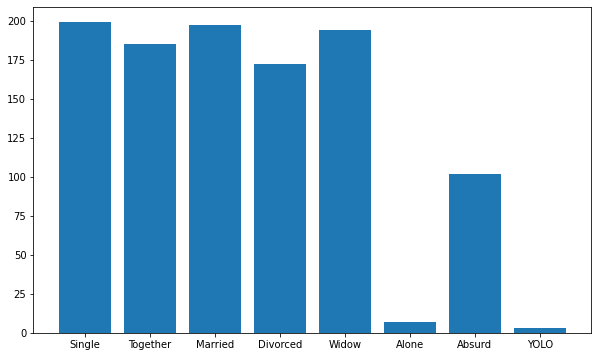

In [74]:
plt.figure(figsize=(10,6))
plt.bar(data['Marital_Status'], data['MntFruits'])

<BarContainer object of 2240 artists>

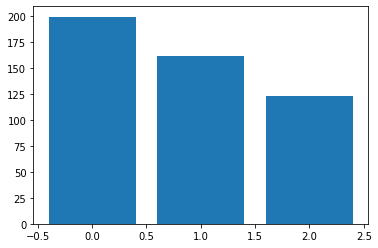

In [75]:
plt.bar(data['Kidhome'], data['MntFruits'])

<BarContainer object of 2240 artists>

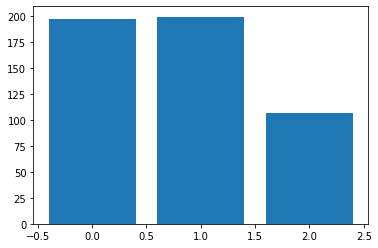

In [76]:
plt.bar(data['Teenhome'], data['MntFruits'])

####Meat

<BarContainer object of 2240 artists>

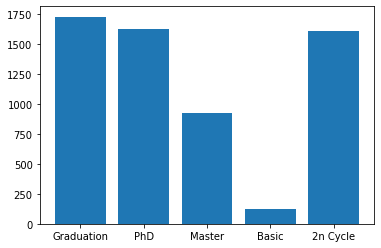

In [77]:
plt.bar(data['Education'], data['MntMeatProducts'])

<BarContainer object of 2240 artists>

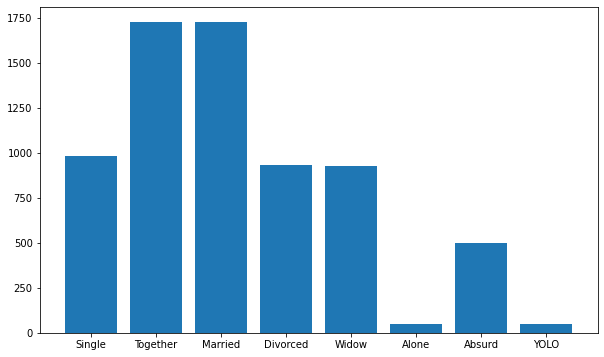

In [78]:
plt.figure(figsize=(10,6))
plt.bar(data['Marital_Status'], data['MntMeatProducts'])

<BarContainer object of 2240 artists>

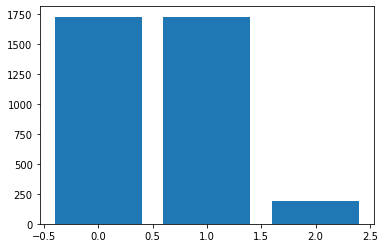

In [79]:
plt.bar(data['Kidhome'], data['MntMeatProducts'])

<BarContainer object of 2240 artists>

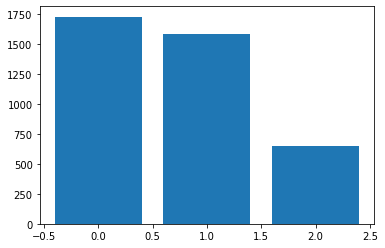

In [80]:
plt.bar(data['Teenhome'], data['MntMeatProducts'])

####Fish

<BarContainer object of 2240 artists>

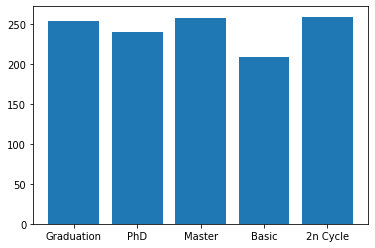

In [81]:
plt.bar(data['Education'], data['MntFishProducts'])

<BarContainer object of 2240 artists>

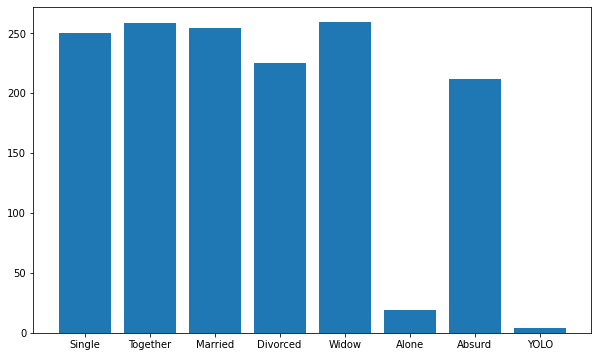

In [82]:
plt.figure(figsize=(10,6))
plt.bar(data['Marital_Status'], data['MntFishProducts'])

<BarContainer object of 2240 artists>

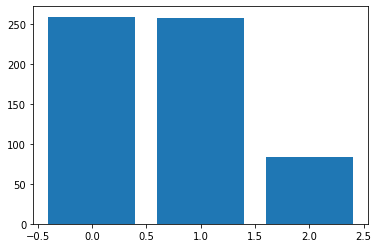

In [83]:
plt.bar(data['Kidhome'], data['MntFishProducts'])

<BarContainer object of 2240 artists>

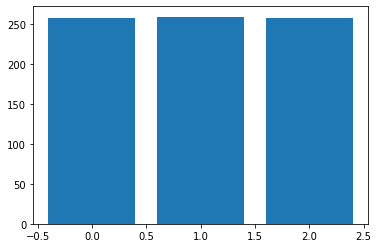

In [84]:
plt.bar(data['Teenhome'], data['MntFishProducts'])

####Sweet

<BarContainer object of 2240 artists>

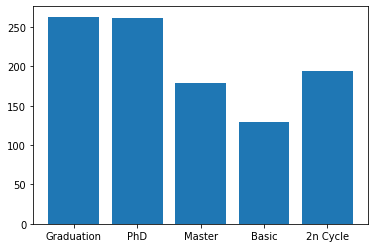

In [85]:
plt.bar(data['Education'], data['MntSweetProducts'])

<BarContainer object of 2240 artists>

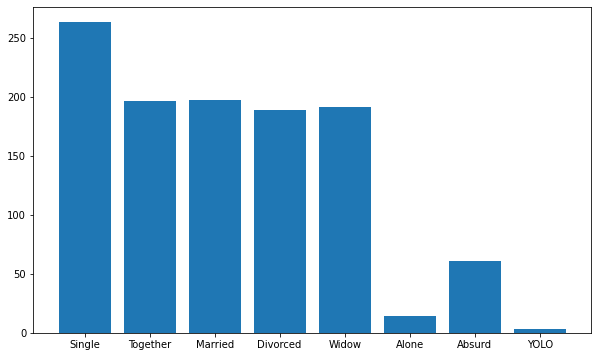

In [86]:
plt.figure(figsize=(10,6))
plt.bar(data['Marital_Status'], data['MntSweetProducts'])

<BarContainer object of 2240 artists>

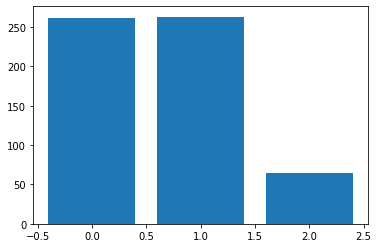

In [87]:
plt.bar(data['Kidhome'], data['MntSweetProducts'])

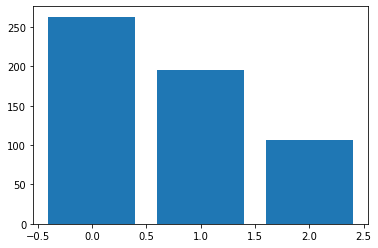

In [88]:
plt.bar(data['Teenhome'], data['MntSweetProducts'])

####Gold

<BarContainer object of 2240 artists>

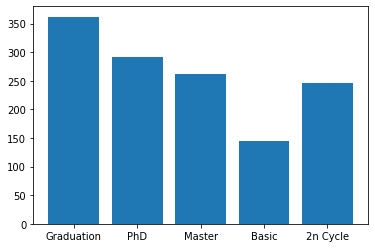

In [89]:
plt.bar(data['Education'], data['MntGoldProds'])

<BarContainer object of 2240 artists>

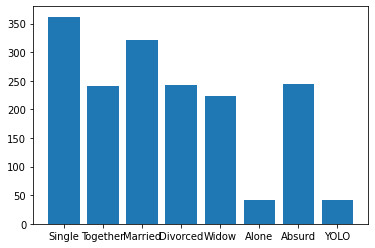

In [90]:
plt.bar(data['Marital_Status'], data['MntGoldProds'])

<BarContainer object of 2240 artists>

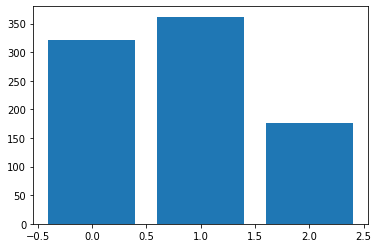

In [91]:
plt.bar(data['Kidhome'], data['MntGoldProds'])

<BarContainer object of 2240 artists>

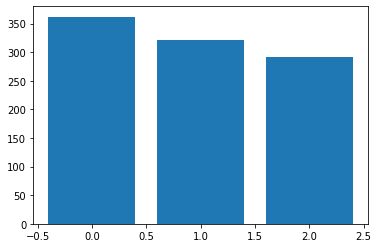

In [92]:
plt.bar(data['Teenhome'], data['MntGoldProds'])

###Num Purchases

####Deals

            NumDealsPurchases
Education                    
Graduation               2603
PhD                      1154
Master                    898
2n Cycle                  456
Basic                      97


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

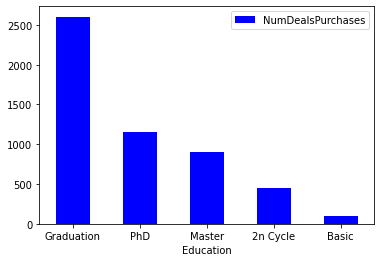

In [93]:
print(data[['Education','NumDealsPurchases']].groupby('Education').sum().sort_values(by='NumDealsPurchases', ascending=False))
data[['Education','NumDealsPurchases']].groupby('Education').sum().sort_values(by='NumDealsPurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

                NumDealsPurchases
Marital_Status                   
Married                      2067
Together                     1348
Single                       1023
Divorced                      565
Widow                         180
Alone                          11
YOLO                           10
Absurd                          4


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

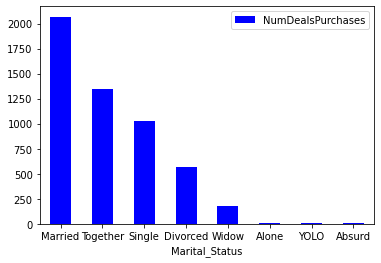

In [94]:
print(data[['Marital_Status','NumDealsPurchases']].groupby('Marital_Status').sum().sort_values(by='NumDealsPurchases', ascending=False))
data[['Marital_Status','NumDealsPurchases']].groupby('Marital_Status').sum().sort_values(by='NumDealsPurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

         NumDealsPurchases
Kidhome                   
1                     2558
0                     2514
2                      136


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

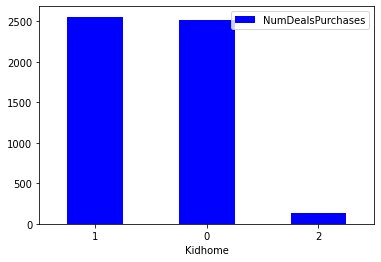

In [95]:
print(data[['Kidhome','NumDealsPurchases']].groupby('Kidhome').sum().sort_values(by='NumDealsPurchases', ascending=False))
data[['Kidhome','NumDealsPurchases']].groupby('Kidhome').sum().sort_values(by='NumDealsPurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

          NumDealsPurchases
Teenhome                   
1                      3186
0                      1840
2                       182


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

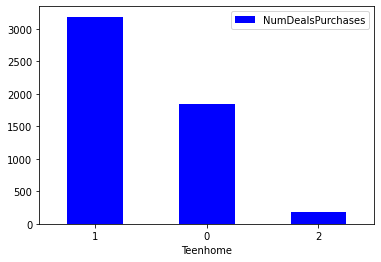

In [96]:
print(data[['Teenhome','NumDealsPurchases']].groupby('Teenhome').sum().sort_values(by='NumDealsPurchases', ascending=False))
data[['Teenhome','NumDealsPurchases']].groupby('Teenhome').sum().sort_values(by='NumDealsPurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

####Web

            NumWebPurchases
Education                  
Graduation             4649
PhD                    2150
Master                 1492
2n Cycle                757
Basic                   102


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

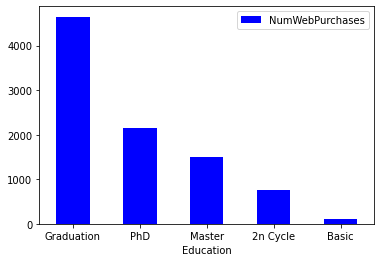

In [97]:
print(data[['Education','NumWebPurchases']].groupby('Education').sum().sort_values(by='NumWebPurchases', ascending=False))
data[['Education','NumWebPurchases']].groupby('Education').sum().sort_values(by='NumWebPurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

                NumWebPurchases
Marital_Status                 
Married                    3532
Together                   2367
Single                     1859
Divorced                   1000
Widow                       356
Alone                        15
YOLO                         14
Absurd                        7


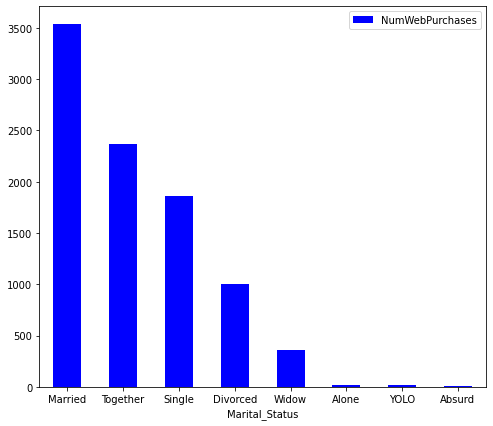

In [98]:
print(data[['Marital_Status','NumWebPurchases']].groupby('Marital_Status').sum().sort_values(by='NumWebPurchases', ascending=False))
data[['Marital_Status','NumWebPurchases']].groupby('Marital_Status').sum().sort_values(by='NumWebPurchases', ascending=False).plot(kind='bar', color='blue', figsize=(8,7))
plt.xticks(rotation=360)
plt.show()

         NumWebPurchases
Kidhome                 
0                   6431
1                   2585
2                    134


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

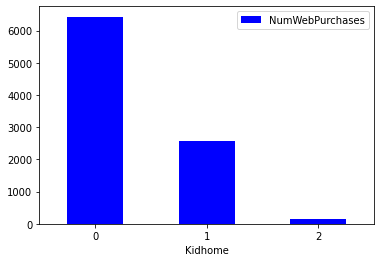

In [99]:
print(data[['Kidhome','NumWebPurchases']].groupby('Kidhome').sum().sort_values(by='NumWebPurchases', ascending=False))
data[['Kidhome','NumWebPurchases']].groupby('Kidhome').sum().sort_values(by='NumWebPurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

          NumWebPurchases
Teenhome                 
1                    4661
0                    4240
2                     249


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

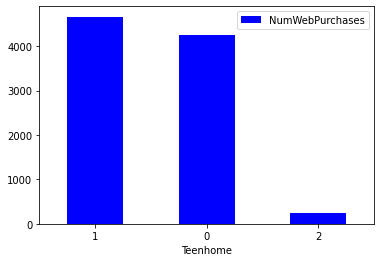

In [100]:
print(data[['Teenhome','NumWebPurchases']].groupby('Teenhome').sum().sort_values(by='NumWebPurchases', ascending=False))
data[['Teenhome','NumWebPurchases']].groupby('Teenhome').sum().sort_values(by='NumWebPurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

####Catalog

            NumCatalogPurchases
Education                      
Graduation                 3072
PhD                        1443
Master                      951
2n Cycle                    471
Basic                        26


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

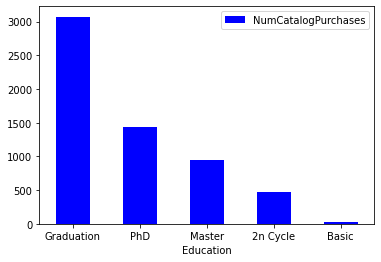

In [101]:
print(data[['Education','NumCatalogPurchases']].groupby('Education').sum().sort_values(by='NumCatalogPurchases', ascending=False))
data[['Education','NumCatalogPurchases']].groupby('Education').sum().sort_values(by='NumCatalogPurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

                NumCatalogPurchases
Marital_Status                     
Married                        2268
Together                       1552
Single                         1248
Divorced                        620
Widow                           256
Absurd                           15
Alone                             2
YOLO                              2


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

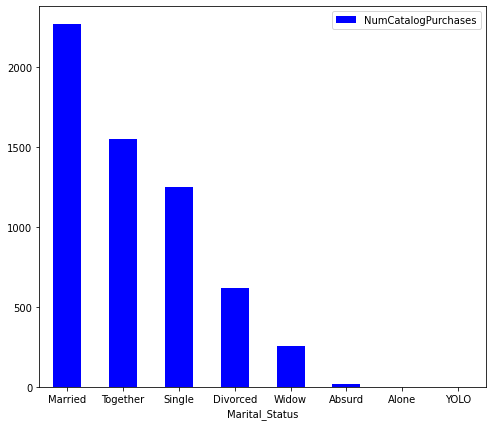

In [102]:
print(data[['Marital_Status','NumCatalogPurchases']].groupby('Marital_Status').sum().sort_values(by='NumCatalogPurchases', ascending=False))
data[['Marital_Status','NumCatalogPurchases']].groupby('Marital_Status').sum().sort_values(by='NumCatalogPurchases', ascending=False).plot(kind='bar', color='blue', figsize=(8,7))
plt.xticks(rotation=360)

         NumCatalogPurchases
Kidhome                     
0                       5118
1                        811
2                         34


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

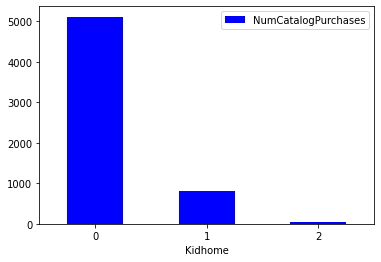

In [103]:
print(data[['Kidhome','NumCatalogPurchases']].groupby('Kidhome').sum().sort_values(by='NumCatalogPurchases', ascending=False))
data[['Kidhome','NumCatalogPurchases']].groupby('Kidhome').sum().sort_values(by='NumCatalogPurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

          NumCatalogPurchases
Teenhome                     
0                        3464
1                        2374
2                         125


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

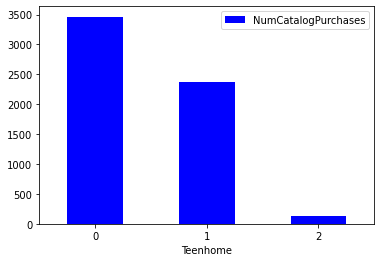

In [104]:
print(data[['Teenhome','NumCatalogPurchases']].groupby('Teenhome').sum().sort_values(by='NumCatalogPurchases', ascending=False))
data[['Teenhome','NumCatalogPurchases']].groupby('Teenhome').sum().sort_values(by='NumCatalogPurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

####Store

            NumStorePurchases
Education                    
Graduation               6570
PhD                      2946
Master                   2182
2n Cycle                 1118
Basic                     154


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

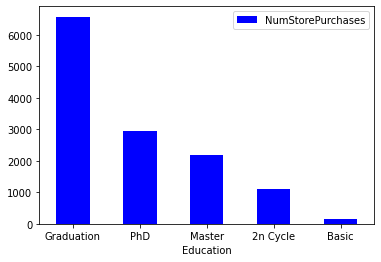

In [105]:
print(data[['Education','NumStorePurchases']].groupby('Education').sum().sort_values(by='NumStorePurchases', ascending=False))
data[['Education','NumStorePurchases']].groupby('Education').sum().sort_values(by='NumStorePurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

                NumStorePurchases
Marital_Status                   
Married                      5055
Together                     3327
Single                       2707
Divorced                     1350
Widow                         494
Absurd                         13
Alone                          12
YOLO                           12


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

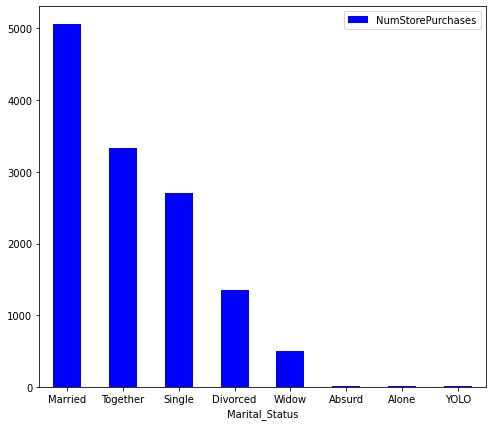

In [106]:
print(data[['Marital_Status','NumStorePurchases']].groupby('Marital_Status').sum().sort_values(by='NumStorePurchases', ascending=False))
data[['Marital_Status','NumStorePurchases']].groupby('Marital_Status').sum().sort_values(by='NumStorePurchases', ascending=False).plot(kind='bar', color='blue', figsize=(8,7))
plt.xticks(rotation=360)

         NumStorePurchases
Kidhome                   
0                     9332
1                     3473
2                      165


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

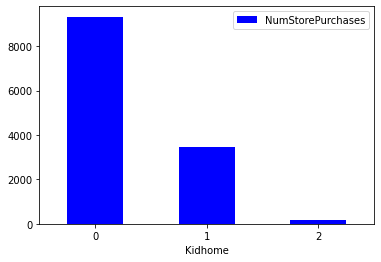

In [107]:
print(data[['Kidhome','NumStorePurchases']].groupby('Kidhome').sum().sort_values(by='NumStorePurchases', ascending=False))
data[['Kidhome','NumStorePurchases']].groupby('Kidhome').sum().sort_values(by='NumStorePurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

          NumStorePurchases
Teenhome                   
0                      6528
1                      6117
2                       325


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

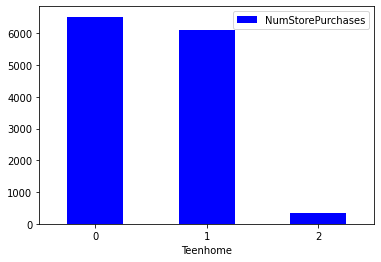

In [108]:
print(data[['Teenhome','NumStorePurchases']].groupby('Teenhome').sum().sort_values(by='NumStorePurchases', ascending=False))
data[['Teenhome','NumStorePurchases']].groupby('Teenhome').sum().sort_values(by='NumStorePurchases', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

###Total Expenses

            Total_Expenses
Education                 
Graduation          698626
PhD                 326791
Master              226359
2n Cycle            100795
Basic                 4417


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

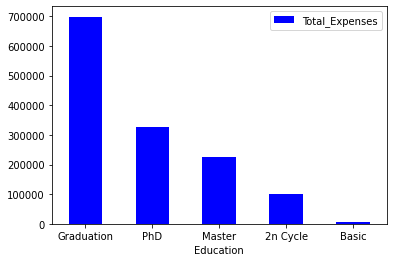

In [109]:
print(data[['Education','Total_Expenses']].groupby('Education').sum().sort_values(by='Total_Expenses', ascending=False))
data[['Education','Total_Expenses']].groupby('Education').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

Graduated have the highest expenses

                Total_Expenses
Marital_Status                
Married                 510453
Together                352865
Single                  291112
Divorced                141666
Widow                    56889
Absurd                    2385
YOLO                       848
Alone                      770


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

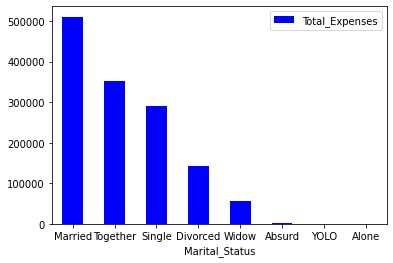

In [110]:
print(data[['Marital_Status','Total_Expenses']].groupby('Marital_Status').sum().sort_values(by='Total_Expenses', ascending=False))
data[['Marital_Status','Total_Expenses']].groupby('Marital_Status').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

Those who are married have the highest expenses

         Total_Expenses
Kidhome                
0               1165330
1                184686
2                  6972


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

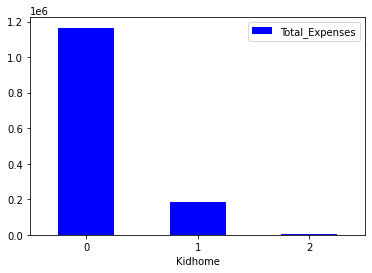

In [111]:
print(data[['Kidhome','Total_Expenses']].groupby('Kidhome').sum().sort_values(by='Total_Expenses', ascending=False))
data[['Kidhome','Total_Expenses']].groupby('Kidhome').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

Those who don't have kids has the highest expenses

          Total_Expenses
Teenhome                
0                 802261
1                 524091
2                  30636


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

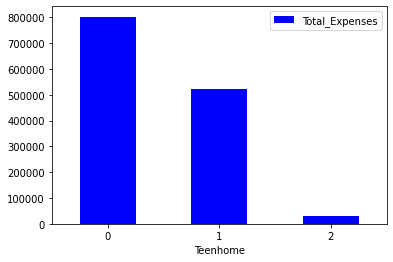

In [112]:
print(data[['Teenhome','Total_Expenses']].groupby('Teenhome').sum().sort_values(by='Total_Expenses', ascending=False))
data[['Teenhome','Total_Expenses']].groupby('Teenhome').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=360)

Those who don't have Teens has the highest expenses

###Overall

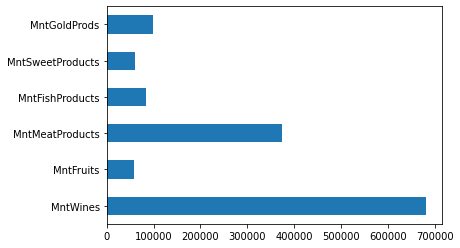

In [113]:
data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().plot(kind='barh')

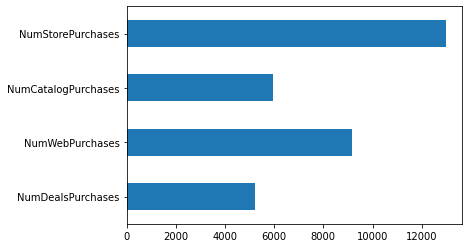

In [114]:
data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().plot(kind='barh')

#Preprocessing

In [115]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Years_customer          0
Total_Expenses          0
Total_Acc_Cmp           0
dtype: int64

In [116]:
data['Income'].fillna(data['Income'].mean(), inplace=True)

In [117]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Years_customer         0
Total_Expenses         0
Total_Acc_Cmp          0
dtype: int64

In [118]:
data_prep = data.copy()
data_prep.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_customer,Total_Expenses,Total_Acc_Cmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,9,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,7,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,8,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,7,53,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,7,422,0


In [119]:
#Encoding
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()
col_enc = ['Education', 'Marital_Status']
for i in col_enc:
  lenc.fit(data_prep[i])
  data_prep[i] = lenc.transform(data_prep[i])
data_prep.head(6)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_customer,Total_Expenses,Total_Acc_Cmp
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,9,1617,0
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,7,27,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,8,776,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,7,53,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,7,422,0
5,7446,1967,3,5,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,54,8,716,0


In [120]:
#Scaling (standard scaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_std = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
           'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
           'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Years_customer',
           'Total_Expenses', 'Total_Acc_Cmp']

for i in col_std:
  std_scaler = np.array(data_prep[i]).reshape(-1,1)
  scaler.fit(std_scaler)
  data_prep[i] = scaler.transform(std_scaler)
data_prep.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_customer,Total_Expenses,Total_Acc_Cmp
0,5524,1957,2,4,0.235327,0,0,2012-09-04,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0,0,0,0,0,0,3,11,1,0.985345,1.502225,1.679417,-0.439037
1,2174,1954,2,4,-0.235826,1,1,2014-03-08,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0,0,0,0,0,0,3,11,0,1.235733,-1.420036,-0.961275,-0.439037
2,4141,1965,2,5,0.773633,0,0,2013-08-21,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0,0,0,0,0,0,3,11,0,0.317643,0.041094,0.282673,-0.439037
3,6182,1984,2,5,-1.022732,1,0,2014-02-10,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0,0,0,0,0,0,3,11,0,-1.268149,-1.420036,-0.918094,-0.439037
4,5324,1981,4,3,0.241519,1,0,2014-01-19,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,0,0,0,0,0,0,3,11,0,-1.017761,-1.420036,-0.305254,-0.439037


In [121]:
data_prep = data_prep.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis=1)

In [122]:
data_prep.head(6)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_customer,Total_Expenses,Total_Acc_Cmp
0,2,4,0.235327,0,0,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0,0,0,0,0,0,3,11,1,0.985345,1.502225,1.679417,-0.439037
1,2,4,-0.235826,1,1,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0,0,0,0,0,0,3,11,0,1.235733,-1.420036,-0.961275,-0.439037
2,2,5,0.773633,0,0,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0,0,0,0,0,0,3,11,0,0.317643,0.041094,0.282673,-0.439037
3,2,5,-1.022732,1,0,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0,0,0,0,0,0,3,11,0,-1.268149,-1.420036,-0.918094,-0.439037
4,4,3,0.241519,1,0,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,0,0,0,0,0,0,3,11,0,-1.017761,-1.420036,-0.305254,-0.439037
5,3,5,0.410102,0,1,-1.143438,0.642051,0.394768,-0.305541,-0.687068,0.361924,-0.575619,-0.168236,0.689386,0.457817,1.295237,0.281720,0,0,0,0,0,0,3,11,0,0.150717,0.041094,0.183025,-0.439037


#Clustering

##KMeans

In [123]:
from sklearn.cluster import KMeans

In [124]:
wcss = []
for i in range(1,5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_prep)
    wcss.append(kmeans.inertia_)

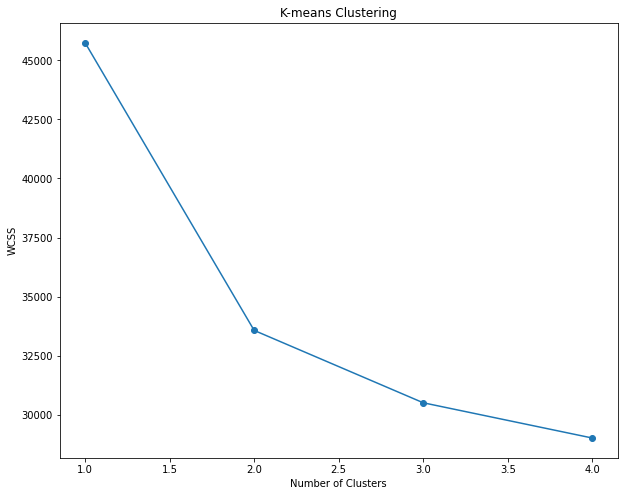

In [125]:
#Elbow method
plt.figure(figsize = (10,8))
plt.plot(range(1,5), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [126]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_prep)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [127]:
label = kmeans.predict(data_prep)
label

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [128]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_prep, label)
print(score)

0.2750711934692233


In [129]:
data_segment = data.copy()
data_segment['Segments'] = label

In [130]:
data_segment.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_customer,Total_Expenses,Total_Acc_Cmp,Segments
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,9,1617,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,7,27,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,8,776,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,7,53,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,7,422,0,1
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,54,8,716,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,50,9,590,0,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,36,8,169,0,1
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,47,8,46,0,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,71,7,49,1,1


In [131]:
data_segment['Segments'].value_counts()

1    1350
0     890
Name: Segments, dtype: int64

In [132]:
#silhoutte method
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_prep)
    label = kmeans.predict(data_prep)
    score = silhouette_score(data_prep, label)
    print("Untuk k=",i,"silhouette score=",score)
        

Untuk k= 2 silhouette score= 0.2750711934692233
Untuk k= 3 silhouette score= 0.18774523815637337
Untuk k= 4 silhouette score= 0.17503894964888086
Untuk k= 5 silhouette score= 0.09617711511569042
Untuk k= 6 silhouette score= 0.08609727489349162
Untuk k= 7 silhouette score= 0.09120960963885116
Untuk k= 8 silhouette score= 0.08072170446796409
Untuk k= 9 silhouette score= 0.08083607103629091


In [133]:
data_segment.groupby(['Segments']).mean()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_customer,Total_Expenses,Total_Acc_Cmp
Segments,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5577.656180,1967.055056,72148.001136,0.077528,0.430337,49.626966,611.648315,56.044944,363.194382,79.521348,57.865169,76.543820,2.034831,5.778652,5.346067,8.575281,3.706742,0.083146,0.135955,0.183146,0.151685,0.029213,0.007865,3.0,11.0,0.228090,53.944944,8.042697,1244.817978,0.583146
1,5601.721481,1969.960000,39127.497794,0.685926,0.556296,48.768148,101.073333,6.694074,37.574074,9.839259,6.756296,22.581481,2.516296,2.968148,0.892593,3.954074,6.377778,0.065926,0.034074,0.000000,0.006667,0.002963,0.010370,3.0,11.0,0.097037,51.040000,7.925185,184.518519,0.109630


- Segment 0 (well-off) = high income, less kid, high expenses, high web purchase, high catalog purchase, high store purchase, low web visits, higher campaign acc
- Segmen 1 (fewer opportunities) = low income, more kids, low expenses, low web purchase, low store purchase, high web visits, higher deals purchase

In [134]:
data_segment['Labels'] = data_segment['Segments'].map({0:'well-off',
                1:'fewer-opportunities'})

In [135]:
data_segment.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_customer,Total_Expenses,Total_Acc_Cmp,Segments,Labels
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,9,1617,0,0,well-off
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,7,27,0,1,fewer-opportunities
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,8,776,0,0,well-off
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,7,53,0,1,fewer-opportunities
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,7,422,0,1,fewer-opportunities
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,54,8,716,0,0,well-off
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,50,9,590,0,0,well-off
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,36,8,169,0,1,fewer-opportunities
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,47,8,46,0,1,fewer-opportunities
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,71,7,49,1,1,fewer-opportunities


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


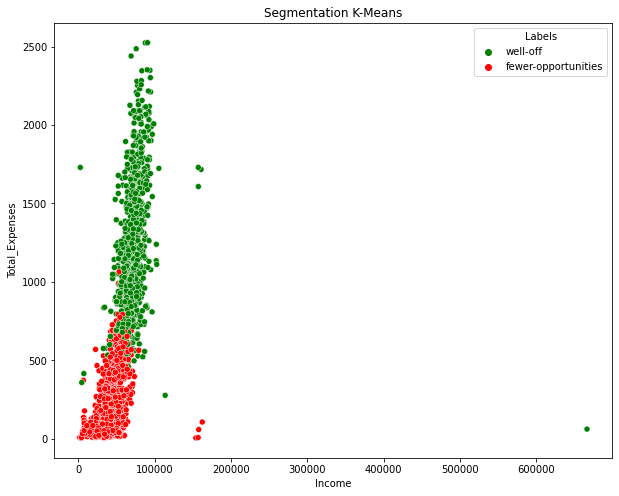

In [136]:
plt.figure(figsize = (10,8))
sns.scatterplot(data_segment['Income'], data_segment['Total_Expenses'], hue = data_segment['Labels'], palette= ['g','r'])
plt.title('Segmentation K-Means')
plt.show()